In [32]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress
plt.style.use('seaborn-notebook')

In [33]:
params = {
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'axes.labelsize':12,
    'legend.fontsize':8,
    'font.family':'Times New Roman',
    'font.weight':'normal',
    'text.usetex':True
}
rcParams.update(params)

width = 2 * 4.963
height = width * .75

In [34]:
data = pd.read_csv('../data/table.csv', index_col=0)
x_R = data['x/R'].values
t = data['MJD'].values
y = np.arccos(x_R)

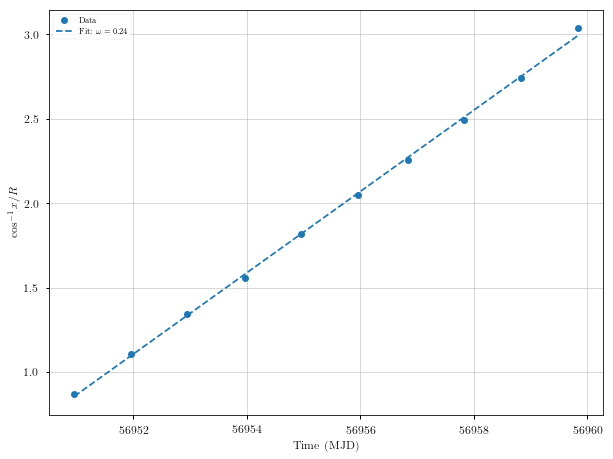

In [35]:
slope, intercept, r, p, std_err = linregress(t, y)

model = lambda t: slope*t + intercept

plt.plot(t, y, 'C0o', label='Data')
plt.plot(t, model(t), 'C0--', label=r'Fit: \omega={:.2f}'.format(slope))
plt.ylabel('\cos^{-1}{x/R}')
plt.xlabel('Time (MJD)')
plt.grid(True, alpha=.5)
plt.legend()


plt.gcf().set_size_inches(width, height)
plt.savefig('../docs/figs/fit.pdf')

## Getting Science from the Math

### Synodic Period
From our equations above, we see that the period of the line, which is our frequency is .24. What units is this? It is the change in a unitless value (arccos) over change in MJD. Modified Julian Date. The change of 1 MJD is equivalent to 1 day, so this frequency is $day^{-1}$. So if we want the frequency in years, we can just multiply by 365.25 $day/yr$. 

### Sidereal Period
We can get the Sidereal period by noting that the sidereal frequency is $\omega_{Side} = 1 + \omega_{Syn}$ and then $T_{Side} = 1/\omega_{Side}$

In [36]:
w_yr = slope * 365.25
O = 1/w_yr
T = 1/(1+1/O)
T * 365.25
print(1/w_yr, 1/(w_yr)**2 * w_yr*std_err)
print(1/(1+w_yr), w_yr*std_err / (1 + w_yr)**2)

0.0114080256659 2.56386954825e-05
0.0112793505453 2.50635816658e-05
